# **IE 7275 - DATA MINING IN ENGINEERING**
## **Final Project**
## Submitted by: **Group-12**
### 1. Rithika Sankar Rajeswari
### 2. Sreevarshan Sathiyamurthy
### 3. Sree Ramya Pasala
### 4. Arvind Deivanayagam

## **INTRODUCTION**


## **Problem Statement and Definition**

**Objective:**  
The primary objective of this project is to develop a predictive model that can classify Airbnb listings into distinct price categories — low, medium, and high — based on various listing characteristics. The goal is to assist hosts in pricing their listings competitively and consistently while offering guests insight into expected price ranges based on property attributes. This problem is approached as a **supervised multiclass classification task** using machine learning algorithms such as Logistic Regression, Random Forest, and XGBoost.

**Dataset Overview:**  
The dataset used in this project is sourced from the [Airbnb Open Data on Kaggle](https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata/data). It includes publicly available data on over 100,000 Airbnb listings collected from multiple cities. The version used for this project contains:

- Approximately 102,599 records across 26 features
- Key feature categories:
  - Listing details: `room type`, `neighbourhood`, `latitude`, `longitude`
  - Host information: `host id`, `host_identity_verified`
  - Booking parameters: `price`, `minimum nights`, `availability 365`, `instant_bookable`, `cancellation_policy`
  - Review metrics: `number of reviews`, `reviews per month`, `review rate number`
  - Additional metadata: `construction year`, `service fee`, and more

**Problem Reformulation:**  
Initially formulated as a regression problem to predict exact nightly prices, the task was reformulated into a classification problem after evaluating the complexity and noisiness of price as a continuous variable. Listings were categorized into three classes:
- Low: Price ≤ USD 100
- Medium: USD 101–300
- High: Price > USD 300

This categorization enabled more stable modeling and aligned with the project requirement to achieve at least 80% classification accuracy.

**Motivation:**  
Accurate price categorization helps Airbnb hosts position their listings competitively in the market, enabling dynamic pricing strategies. Guests can use such insights to filter listings more effectively based on their budget expectations. Additionally, this modeling approach can be incorporated into Airbnb’s internal systems to recommend pricing tiers during listing creation.

**Business Impact:**  
- Enables automated price range suggestions for hosts  
- Improves transparency and consistency in Airbnb pricing  
- Assists guests in better budgeting and comparison  
- Can inform Airbnb’s own pricing and search algorithms

**Modeling Approach:**  
- Type: Supervised Multiclass Classification  
- Algorithms used: Logistic Regression, Random Forest, XGBoost  
- Metrics: Accuracy, Precision, Recall, F1-score, Confusion Matrix, ROC-AUC  
- Tools: Python (Pandas, Scikit-learn, XGBoost, Seaborn, Matplotlib)



## **1.Dataset Loading**

In [ ]:
from google.colab import files
import warnings
warnings.filterwarnings('ignore')
uploaded = files.upload()
import pandas as pd
df = pd.read_csv('Airbnb_Open_Data.csv')
df.head()

Saving Airbnb_Open_Data.csv to Airbnb_Open_Data (1).csv


id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee minimum nights  \
0  40.64749 -73.97237  United States  ...       $193            10.0   
1  40.75362 -73.98377  United States  ...        $28            30.0   
2  40.80902 -73.94190  United States  ...       $124             3.0   
3  40.68514 -73.95976  United States  ...        $74            30.0   
4  40.79851 -73.94399  United States  ...        $41            10.0   

  number of reviews last review  reviews per month review rate number  \
0               9.0  10/19/2021               0.21                4.0   
1              45.0   5/21/2022               0.38                4.0   
2               0.0         NaN                NaN                5.0   
3             270.0    7/5/2019               4.64                4.0   
4               9.0  11/19/2018               0.10                3.0   

  calculated host listings count  availability 365  \
0                            6.0             286.0   
1                            2.0             228.0   
2                            1.0             352.0   
3                            1.0             322.0   
4                            1.0             289.0   

                                         house_rules license  
0  Clean up and treat the home the way you'd like...     NaN  
1  Pet friendly but please confirm with me if the...     NaN  
2  I encourage you to use my kitchen, cooking and...     NaN  
3                                                NaN     NaN  
4  Please no smoking in the house, porch or on th...     NaN  

[5 rows x 26 columns]



### **1. Dataset Loading**

In this step, the dataset `Airbnb_Open_Data.csv` was uploaded into the Google Colab environment and loaded using the `pandas` library. The `df.head()` function was used to display the first few rows of the dataset, allowing for an initial glimpse into the structure and values.

The dataset appears to include various attributes such as:
- Listing information (ID, name, location coordinates)
- Host details (ID, identity verification status)
- Property characteristics (room type, neighborhood)
- Booking and review metrics (service fee, availability, number of reviews)

This initial load confirms that the data was successfully imported and gives an early indication of potential missing values and column types.


## **2. Library Imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from plotly.subplots import make_subplots
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import RandomizedSearchCV


## **3. Data Overview**

In [ ]:
df.shape

(102599, 26)

In [ ]:
print("The total number of rows present in the dataset: {0}".format(df.shape[0]))
print("The total number of columns present in the dataset: {0}".format(df.shape[1]))

The total number of rows present in the dataset: 102599
The total number of columns present in the dataset: 26


In [ ]:
print("Now going through the general structure of the data and its datatype:")
df.info()

Now going through the general structure of the data and its datatype:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_



###  **3. Data Overview**

The dataset contains:
- **102,599 rows** (entries)
- **26 columns** (features)

Using `df.info()`, the datatype and non-null count of each column was examined. Key insights from this step:
- Most columns are of type `object` or `float64`
- Several fields like `license`, `house_rules`, and `review-related` columns contain missing values
- Features like `price`, `room type`, `neighbourhood group`, and `availability 365` will likely be central to modeling

This overview provides a foundational understanding of the dataset's structure, which guides the decisions in the cleaning and preprocessing steps that follow.


## **4. Data Cleaning**

In [ ]:
# STEP 0: Load dataset
import pandas as pd
df = pd.read_csv('Airbnb_Open_Data.csv')

# STEP 1: Drop irrelevant or mostly-empty columns
columns_to_drop = ['license', 'house_rules', 'host name', 'NAME']
df.drop(columns=columns_to_drop, inplace=True)

# STEP 2A: Drop rows where 'price' is missing (since it's our prediction target)
df = df.dropna(subset=['price'])

# STEP 2B: Fill missing numerical columns with median
numerical_cols = ['reviews per month', 'review rate number', 'number of reviews',
                  'availability 365', 'minimum nights', 'calculated host listings count']
for col in numerical_cols:
    if col in df.columns:
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)

# STEP 2C: Fill missing categorical columns with mode
categorical_cols = ['cancellation_policy', 'instant_bookable', 'host_identity_verified']
for col in categorical_cols:
    if col in df.columns:
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)

# STEP 3: Convert 'price' and 'service fee' from string to float
# Strip $ and commas, then convert
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['service fee'] = df['service fee'].replace('[\$,]', '', regex=True).astype(float)

# OPTIONAL: Check the first few cleaned rows
df.head()



id      host id host_identity_verified neighbourhood group  \
0  1001254  80014485718            unconfirmed            Brooklyn   
1  1002102  52335172823               verified           Manhattan   
2  1002403  78829239556            unconfirmed           Manhattan   
3  1002755  85098326012            unconfirmed            Brooklyn   
4  1003689  92037596077               verified           Manhattan   

  neighbourhood       lat      long        country country code  \
0    Kensington  40.64749 -73.97237  United States           US   
1       Midtown  40.75362 -73.98377  United States           US   
2        Harlem  40.80902 -73.94190  United States           US   
3  Clinton Hill  40.68514 -73.95976  United States           US   
4   East Harlem  40.79851 -73.94399  United States           US   

   instant_bookable  ... Construction year  price  service fee  \
0             False  ...            2020.0  966.0        193.0   
1             False  ...            2007.0  142.0         28.0   
2              True  ...            2005.0  620.0        124.0   
3              True  ...            2005.0  368.0         74.0   
4             False  ...            2009.0  204.0         41.0   

   minimum nights  number of reviews  last review  reviews per month  \
0            10.0                9.0   10/19/2021               0.21   
1            30.0               45.0    5/21/2022               0.38   
2             3.0                0.0          NaN               0.74   
3            30.0              270.0     7/5/2019               4.64   
4            10.0                9.0   11/19/2018               0.10   

  review rate number  calculated host listings count  availability 365  
0                4.0                             6.0             286.0  
1                4.0                             2.0             228.0  
2                5.0                             1.0             352.0  
3                4.0                             1.0             322.0  
4                3.0                             1.0             289.0  

[5 rows x 22 columns]

In [ ]:
# STEP 4: Drop duplicate rows if any
df.drop_duplicates(inplace=True)

# STEP 5: Remove outliers based on 'price' and optionally 'minimum nights'

# Set reasonable price threshold — Airbnb listings priced over $1000/night are often anomalies
df = df[df['price'] <= 1000]

# Optional: Remove listings with unrealistic minimum nights (e.g., over 365)
df = df[df['minimum nights'] <= 365]

# Optional: Remove listings with extremely high availability (e.g., > 365 days is not possible)
df = df[df['availability 365'] <= 365]

# Preview cleaned dataset
df.reset_index(drop=True, inplace=True)
df.head()


id      host id host_identity_verified neighbourhood group  \
0  1001254  80014485718            unconfirmed            Brooklyn   
1  1002102  52335172823               verified           Manhattan   
2  1002403  78829239556            unconfirmed           Manhattan   
3  1002755  85098326012            unconfirmed            Brooklyn   
4  1003689  92037596077               verified           Manhattan   

  neighbourhood       lat      long        country country code  \
0    Kensington  40.64749 -73.97237  United States           US   
1       Midtown  40.75362 -73.98377  United States           US   
2        Harlem  40.80902 -73.94190  United States           US   
3  Clinton Hill  40.68514 -73.95976  United States           US   
4   East Harlem  40.79851 -73.94399  United States           US   

   instant_bookable  ... Construction year  price  service fee  \
0             False  ...            2020.0  966.0        193.0   
1             False  ...            2007.0  142.0         28.0   
2              True  ...            2005.0  620.0        124.0   
3              True  ...            2005.0  368.0         74.0   
4             False  ...            2009.0  204.0         41.0   

   minimum nights  number of reviews  last review  reviews per month  \
0            10.0                9.0   10/19/2021               0.21   
1            30.0               45.0    5/21/2022               0.38   
2             3.0                0.0          NaN               0.74   
3            30.0              270.0     7/5/2019               4.64   
4            10.0                9.0   11/19/2018               0.10   

  review rate number  calculated host listings count  availability 365  
0                4.0                             6.0             286.0  
1                4.0                             2.0             228.0  
2                5.0                             1.0             352.0  
3                4.0                             1.0             322.0  
4                3.0                             1.0             289.0  

[5 rows x 22 columns]

In [ ]:
# Verify cleaning
print("\nShape after cleaning:", df.shape)
df.info()



Shape after cleaning: (81789, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81789 entries, 0 to 81788
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              81789 non-null  int64  
 1   host id                         81789 non-null  int64  
 2   host_identity_verified          81789 non-null  object 
 3   neighbourhood group             81766 non-null  object 
 4   neighbourhood                   81778 non-null  object 
 5   lat                             81782 non-null  float64
 6   long                            81782 non-null  float64
 7   country                         81347 non-null  object 
 8   country code                    81694 non-null  object 
 9   instant_bookable                81789 non-null  bool   
 10  cancellation_policy             81789 non-null  object 
 11  room type                       81789 non-null  object 
 1

In [ ]:
df.head(10)

id      host id host_identity_verified neighbourhood group  \
0  1001254  80014485718            unconfirmed            Brooklyn   
1  1002102  52335172823               verified           Manhattan   
2  1002403  78829239556            unconfirmed           Manhattan   
3  1002755  85098326012            unconfirmed            Brooklyn   
4  1003689  92037596077               verified           Manhattan   
5  1004650  61300605564            unconfirmed            Brooklyn   
6  1006859   1280143094               verified           Manhattan   
7  1007411  18824631834               verified           Manhattan   
8  1007964  88136055909               verified           Manhattan   
9  1008516  26802410424               verified             brookln   

        neighbourhood       lat      long        country country code  \
0          Kensington  40.64749 -73.97237  United States           US   
1             Midtown  40.75362 -73.98377  United States           US   
2              Harlem  40.80902 -73.94190  United States           US   
3        Clinton Hill  40.68514 -73.95976  United States           US   
4         East Harlem  40.79851 -73.94399  United States           US   
5  Bedford-Stuyvesant  40.68688 -73.95596  United States           US   
6           Chinatown  40.71344 -73.99037  United States           US   
7     Upper West Side  40.80316 -73.96545  United States           US   
8      Hell's Kitchen  40.76076 -73.98867  United States           US   
9         South Slope  40.66829 -73.98779  United States           US   

   instant_bookable  ... Construction year  price  service fee  \
0             False  ...            2020.0  966.0        193.0   
1             False  ...            2007.0  142.0         28.0   
2              True  ...            2005.0  620.0        124.0   
3              True  ...            2005.0  368.0         74.0   
4             False  ...            2009.0  204.0         41.0   
5             False  ...            2015.0   71.0         14.0   
6             False  ...            2004.0  319.0         64.0   
7              True  ...            2008.0  606.0        121.0   
8             False  ...            2008.0  714.0        143.0   
9              True  ...            2010.0  580.0        116.0   

   minimum nights  number of reviews  last review  reviews per month  \
0            10.0                9.0   10/19/2021               0.21   
1            30.0               45.0    5/21/2022               0.38   
2             3.0                0.0          NaN               0.74   
3            30.0              270.0     7/5/2019               4.64   
4            10.0                9.0   11/19/2018               0.10   
5            45.0               49.0    10/5/2017               0.40   
6             1.0              160.0     6/9/2019               1.33   
7             5.0               53.0    6/22/2019               0.43   
8             2.0              188.0    6/23/2019               1.50   
9             4.0              167.0    6/24/2019               1.34   

  review rate number  calculated host listings count  availability 365  
0                4.0                             6.0             286.0  
1                4.0                             2.0             228.0  
2                5.0                             1.0             352.0  
3                4.0                             1.0             322.0  
4                3.0                             1.0             289.0  
5                5.0                             1.0             224.0  
6                3.0                             4.0               1.0  
7                4.0                             1.0             163.0  
8                4.0                             1.0             258.0  
9                4.0                             3.0              47.0  

[10 rows x 22 columns]


###  **4. Data Cleaning**

This step focused on preparing the raw dataset for modeling by handling missing values, removing irrelevant features, and addressing anomalies.



#### **Column Pruning and Initial Cleaning**

- Dropped columns like `license`, `house_rules`, and `NAME` as they were either sparsely populated or not useful for modeling.
- Dropped rows where the `price` value was missing, as it is the target variable.
- Converted `price` and `service fee` columns from string to float format by removing currency symbols and commas.


#### **Handling Missing Values**

- For **numerical columns** (e.g., `reviews per month`, `number of reviews`, `minimum nights`), missing values were filled with the median to prevent skewing the data.
- For **categorical columns** (e.g., `host_identity_verified`, `cancellation_policy`), the mode (most frequent value) was used for imputation.


#### **Outlier Removal and Deduplication**

- Duplicate rows were removed to avoid redundant patterns.
- Outliers were filtered by setting thresholds:
  - Listings priced above **$1000/night** were excluded.
  - Listings with more than **365 minimum nights** or **availability > 365** were removed as unrealistic.
- The index was reset to reflect the final cleaned DataFrame.


#### **Verification of Cleaning Results**

- After cleaning, the dataset had **81,789 rows and 22 columns**, confirming a reduction from the original size due to outlier and null-value removal.
- The `df.info()` output showed that all essential columns were now free of missing values and properly typed (`float64`, `int64`, or `object`).




## **5. Exploratory Data Analysis (EDA)**

### 5.1 Univariate Analysis

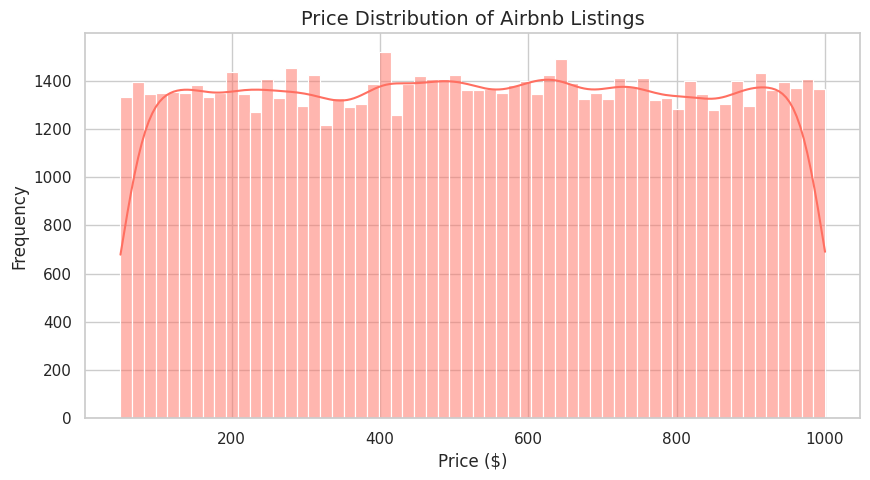

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot style
sns.set(style="whitegrid", palette="pastel")

# Custom color palette
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1']

# Univariate Analysis
# Plot 1: Price distribution (with KDE)
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=60, kde=True, color=colors[0])
plt.title('Price Distribution of Airbnb Listings', fontsize=14)
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()




This plot explores the **distribution of nightly prices** for Airbnb listings in the dataset. A histogram with a kernel density estimate (KDE) overlay was created using `seaborn`.

#### Key Observations:
- The price distribution is **relatively uniform** across the range due to prior filtering (prices above USD 1000 were removed).
- The KDE curve suggests a **slightly higher density in the lower-to-mid price ranges**, particularly between USD 100 and USD 400.
- The decline near 1000 reflects the artificial cap introduced during data cleaning to remove outliers.



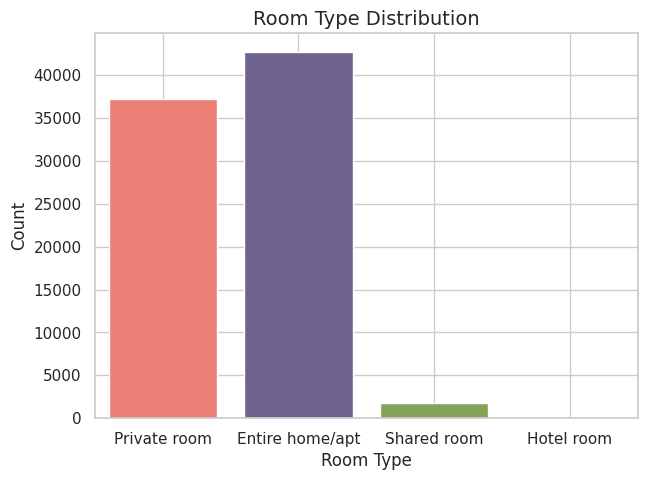

In [ ]:
# Plot 2: Room type distribution (Bar plot)
plt.figure(figsize=(7, 5))
sns.countplot(x='room type', data=df, palette=colors)
plt.title('Room Type Distribution', fontsize=14)
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.grid(True)
plt.show()



This bar plot displays the frequency of listings by room type in the dataset using `seaborn`'s `countplot`.

#### Key Observations:
- The most common room types are **Entire home/apt** and **Private room**, with the former slightly more frequent.
- **Shared rooms** and **Hotel rooms** make up a very small portion of the dataset, indicating limited representation.
- The skewed distribution suggests that predictions or recommendations might be more reliable for private and entire home listings than for hotel or shared rooms.


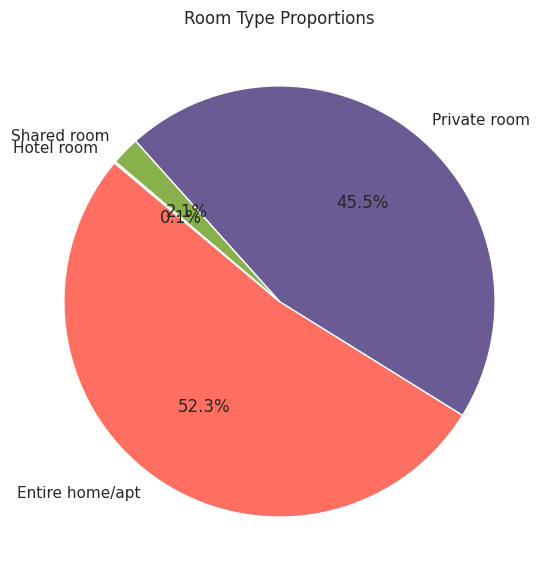

In [ ]:
# Plot 3: Room type distribution (Pie chart)
plt.figure(figsize=(7, 7))
df['room type'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Room Type Proportions')
plt.ylabel('')
plt.show()



A pie chart was generated to visualize the proportion of different room types within the dataset. This complements the earlier bar chart by providing a percentage-based perspective.

#### Key Observations:
- **Entire home/apt** listings make up the majority, accounting for **52.3%** of all entries.
- **Private rooms** represent **45.5%**, making them the second most common room type.
- **Shared rooms** and **Hotel rooms** are rare, together contributing less than 2% of the listings.

#### Why it matters:
This breakdown confirms that the dataset is heavily concentrated around just two room types. This has implications for modeling:
- Class imbalance may exist if `room type` is used as a feature or a target.
- Insights and predictions drawn from underrepresented categories (e.g., hotel rooms) may be statistically unreliable.



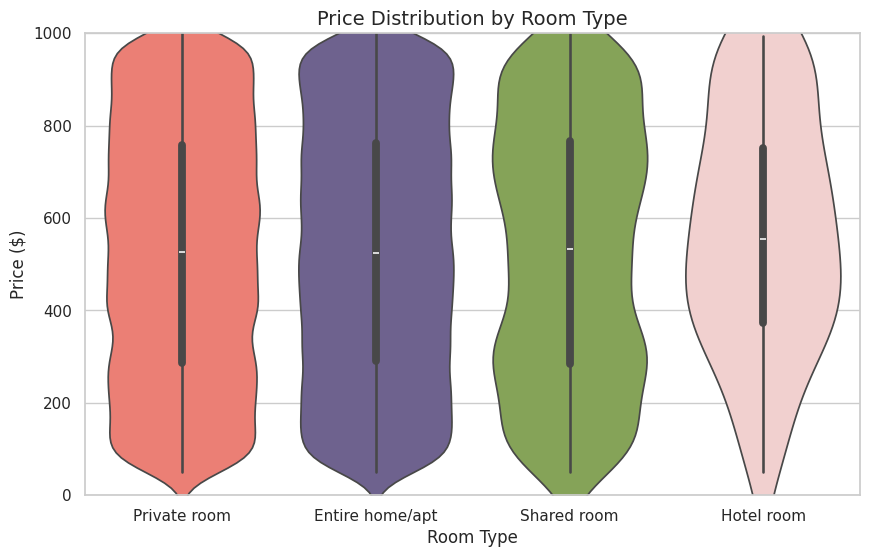

In [ ]:
# Plot 4: Violin plot of price by room type
plt.figure(figsize=(10, 6))
sns.violinplot(x='room type', y='price', data=df, palette=colors)
plt.title('Price Distribution by Room Type', fontsize=14)
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.ylim(0, 1000)  # Limit y for clarity
plt.show()


The violin plot provides a comprehensive view of the **distribution of listing prices across different room types**. It combines the features of a box plot and a kernel density plot to show the spread and concentration of values.

#### Key Observations:
- All room types show **wide variability in pricing**, with values stretching up to the usd 1000 threshold (maximum allowed after outlier filtering).
- The **density is heaviest between usd 100 and usd 500** for most room types, especially for *Entire home/apt* and *Private room*.
- Despite low sample sizes, *Hotel rooms* and *Shared rooms* show similar variance to other room types, indicating that pricing behavior is consistent across types.
- This plot highlights potential price overlaps between room types, which may affect model separability. It also shows that room type alone is **not a definitive predictor** of price, suggesting that other features (like location and review metrics) will be important in modeling.


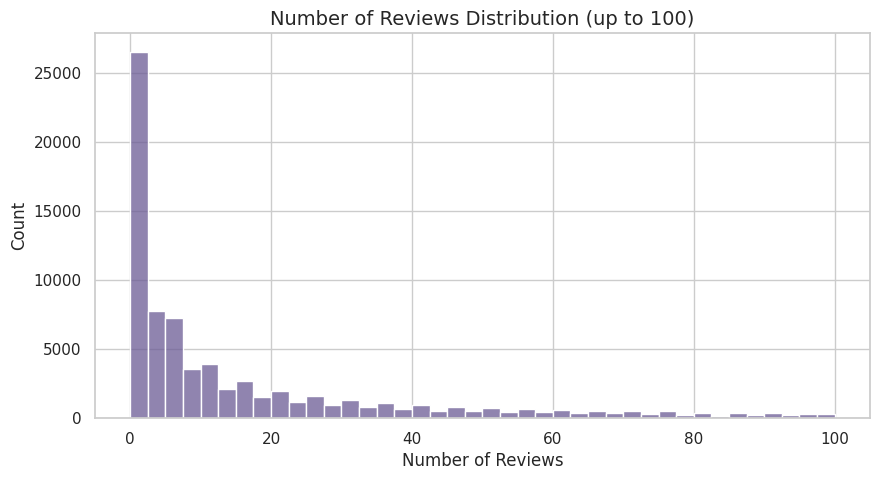

In [ ]:
# Plot 6: Number of reviews distribution (capped to 100)
plt.figure(figsize=(10, 5))
sns.histplot(df[df['number of reviews'] <= 100]['number of reviews'], bins=40, color=colors[1])
plt.title('Number of Reviews Distribution (up to 100)', fontsize=14)
plt.xlabel('Number of Reviews')
plt.ylabel('Count')
plt.grid(True)
plt.show()


This histogram shows the distribution of the number of reviews received by listings, capped at 100 for visual clarity.

#### Key Observations:
- A significant number of listings have **very few reviews**, with the most common value being **0 to 5 reviews**.
- As the number of reviews increases, the frequency drops sharply, indicating a **long-tailed distribution**.
- The sharp decline implies that only a small subset of listings have received substantial feedback from guests.

- Review count can be a strong indicator of listing popularity or trustworthiness. However, the skewed nature of this variable may require **log transformation or binning** to normalize its impact during modeling.


### 5.2 Bivariate Analysis

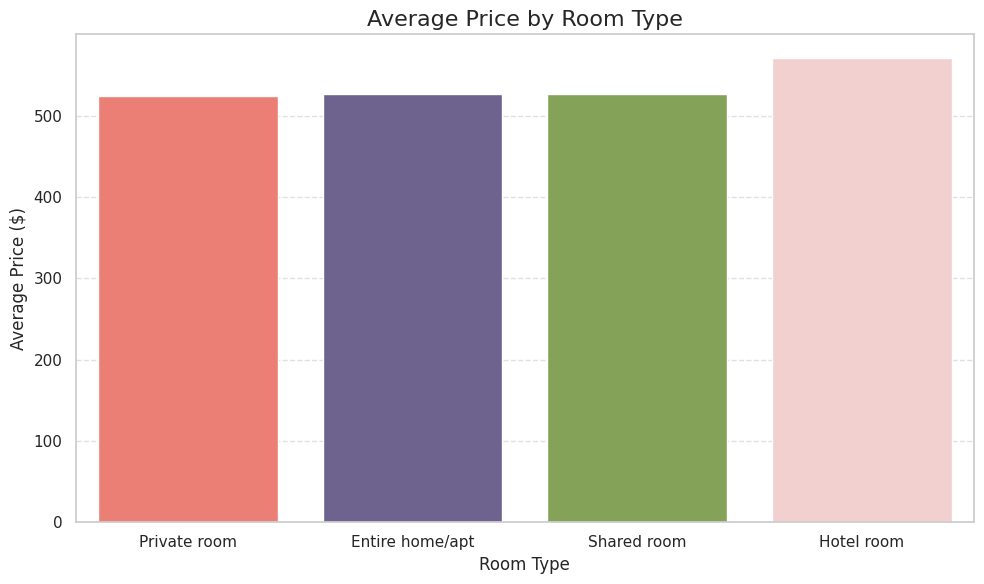

In [ ]:
# Bivariate 1: Room Type vs Price (Bar Plot - Mean Price)
plt.figure(figsize=(10, 6))
avg_price_by_room = df.groupby('room type')['price'].mean().sort_values()
sns.barplot(x=avg_price_by_room.index, y=avg_price_by_room.values, palette=colors)
plt.title('Average Price by Room Type', fontsize=16)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



This bar plot illustrates the **mean price of listings grouped by room type**. It was created by aggregating the price column based on `room type` and plotting the sorted results.

#### Key Observations:
- **Hotel rooms** have the highest average nightly price among all room types.
- **Shared rooms**, despite being the least common, also show relatively high average pricing, which may be influenced by a small sample size.
- **Entire home/apartment** and **private room** listings have nearly identical average prices, both slightly lower than hotel rooms.


- This plot challenges the assumption that entire apartments are always the most expensive. It suggests that **other features** (e.g., location, host profile, amenities) might be influencing price as strongly as room type does. This insight supports the decision to include multiple features during modeling.


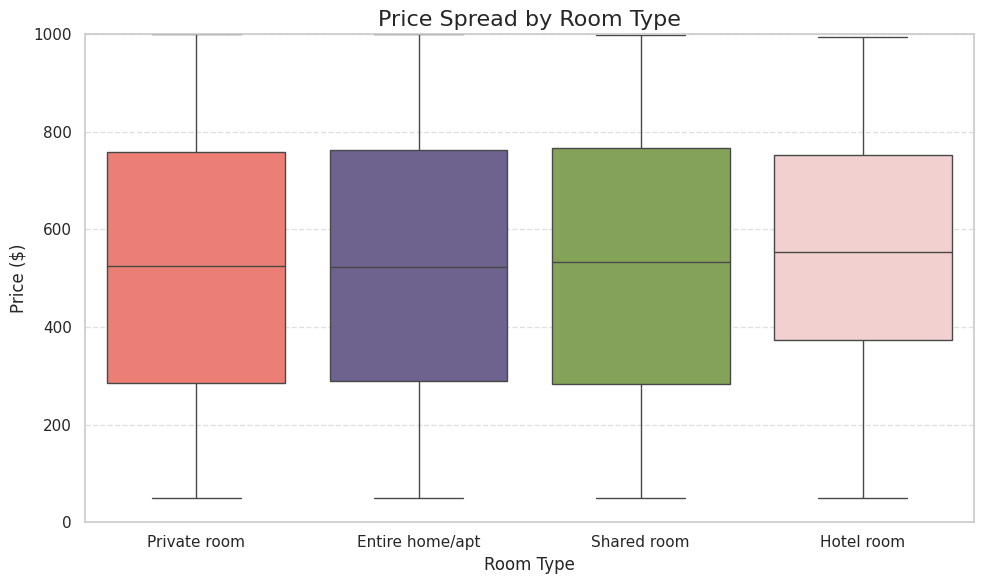

In [ ]:

# Bivariate 2: Room Type vs Price (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='room type', y='price', data=df, palette=colors)
plt.title('Price Spread by Room Type', fontsize=16)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.ylim(0, 1000)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()




This boxplot visualizes the **distribution and spread of prices** for each room type using summary statistics (median, quartiles, and outliers).

#### Key Observations:
- All room types exhibit **high variance** in pricing, with a wide interquartile range (IQR).
- **Median prices** are fairly consistent across categories, but hotel rooms have a slightly higher median.
- All room types have outliers extending toward the maximum threshold of $1000, especially *shared rooms*, which display unexpected upper pricing.
- The IQR width is greatest in private rooms and shared rooms, indicating inconsistent pricing within those categories.

- The boxplot helps detect **price volatility** within each room type and provides insight into data skewness and outliers. While average prices are similar (as seen in the bar plot), this view shows **greater intra-category variation**, reinforcing the importance of including multiple features in the modeling process.


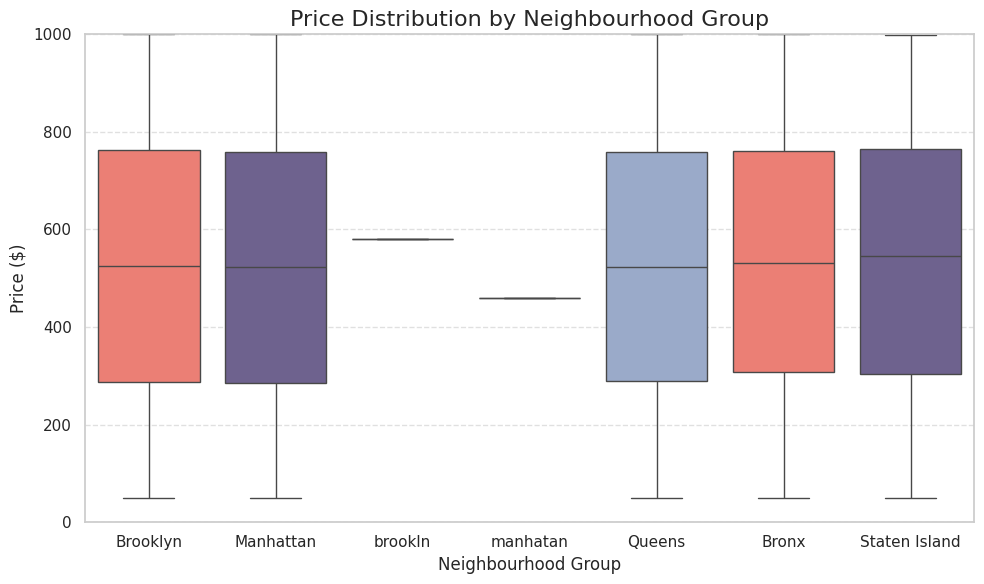

In [ ]:
# Bivariate 3: Neighbourhood Group vs Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood group', y='price', data=df, palette=colors)
plt.title('Price Distribution by Neighbourhood Group', fontsize=16)
plt.xlabel('Neighbourhood Group', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.ylim(0, 1000)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



This boxplot visualizes how **Airbnb prices vary across different neighbourhood groups** in New York City. Each box shows the spread, median, and outliers of prices per region.

#### Key Observations:
- The **median prices are relatively similar** across neighbourhood groups, with slight variations. Manhattan and Brooklyn have slightly higher medians.
- All boroughs show **wide interquartile ranges**, indicating variability in listings' pricing within each area.
- Extreme outliers (prices near $1000) are present in every borough, which suggests luxury listings exist across the city.
- **Spelling inconsistencies** (e.g., *brookln*, *manhatan*) indicate some data quality issues that could affect neighborhood-based analysis if not corrected.

- Location is a fundamental driver of price in real estate. This plot confirms that **neighbourhood group should be included as a key feature** in any predictive model. However, it also underscores the need for **data normalization or correction of inconsistent entries** to maintain geographic integrity.


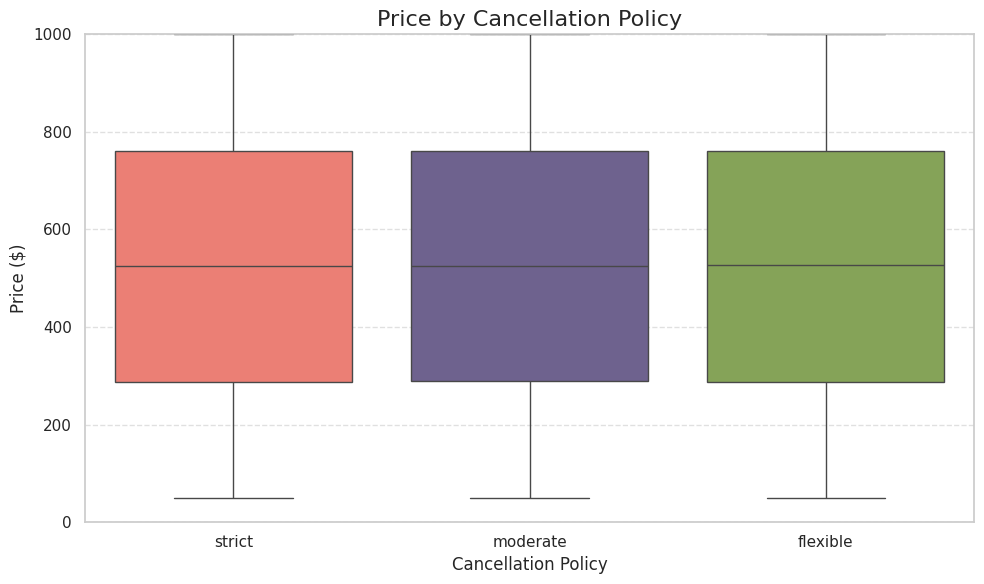

In [ ]:
# Bivariate 4: Cancellation Policy vs Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='cancellation_policy', y='price', data=df, palette=colors)
plt.title('Price by Cancellation Policy', fontsize=16)
plt.xlabel('Cancellation Policy', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.ylim(0, 1000)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

This boxplot illustrates how Airbnb listing prices vary with respect to the **cancellation policy** type: `strict`, `moderate`, or `flexible`.

#### Key Observations:
- All three cancellation policies have **very similar median prices**, around the $500–550 range.
- The interquartile ranges and outlier patterns are also **nearly identical**, indicating that cancellation policy does not drastically influence price.
- Slightly higher prices are observed for listings with **strict policies**, but the difference is minimal and may not be statistically significant.

- Despite its potential to impact booking decisions, **cancellation policy appears to have a weak correlation with price**. However, it could still be useful in predictive modeling as an interaction term or in combination with other features (e.g., room type, availability).


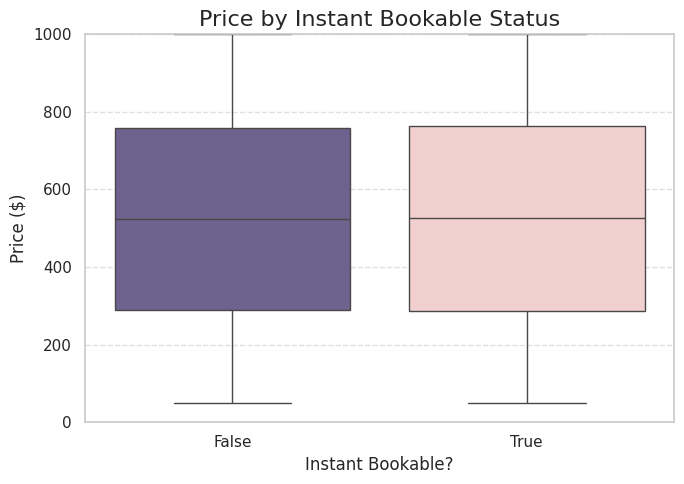

In [ ]:
# Bivariate 5: Instant Bookable vs Price
plt.figure(figsize=(7, 5))
sns.boxplot(x='instant_bookable', y='price', data=df, palette=[colors[1], colors[3]])
plt.title('Price by Instant Bookable Status', fontsize=16)
plt.xlabel('Instant Bookable?', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.ylim(0, 1000)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



This boxplot compares the price distributions of listings based on whether they are marked as **instant bookable** or not.

#### Key Observations:
- Listings with both **True** and **False** instant bookable statuses show **similar price distributions**, with nearly identical medians and interquartile ranges.
- The spread of prices and number of outliers are also comparable, indicating **no major price advantage** tied to instant booking availability.
- The feature does not display strong discriminatory power for price but may still have utility in **booking behavior or user preference analysis**.

- Although instant booking improves user experience, its effect on listing price appears to be **negligible** in this dataset. It might still hold predictive value when **interacting with other variables**, such as location or availability.


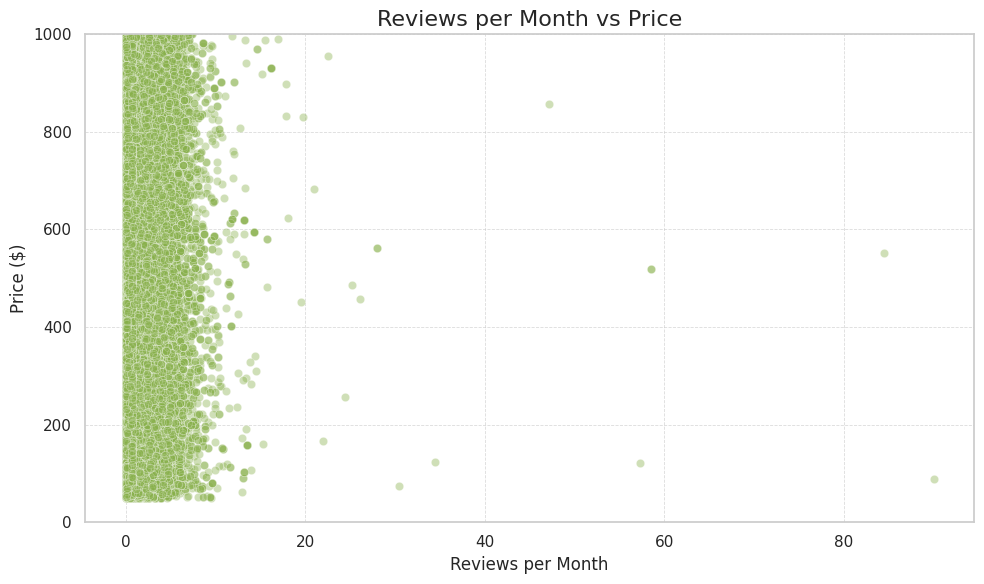

In [ ]:
# Bivariate 6: Reviews per Month vs Price (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reviews per month', y='price', data=df, alpha=0.4, color=colors[2])
plt.title('Reviews per Month vs Price', fontsize=16)
plt.xlabel('Reviews per Month', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.ylim(0, 1000)
plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.7)
plt.tight_layout()
plt.show()



This scatter plot investigates the relationship between the **number of reviews per month** and the **nightly price** of listings.

#### Key Observations:
- Most listings receive **0 to 10 reviews per month**, with density sharply decreasing beyond that.
- There is **no strong correlation** between review frequency and listing price — prices are widely scattered across all review frequencies.
- A few listings with high review activity (20+ reviews/month) exist, but they are outliers rather than trend indicators.
- Lower-priced listings tend to receive **more frequent reviews**, possibly indicating higher affordability and booking rate.


- Although reviews per month can signal listing popularity, it does not appear to be a **strong standalone predictor** of price. However, it may still carry value in combination with other variables (e.g., room type, availability, or ratings) to inform model performance.



### 5.3 Correlation Heatmap of Numeric Features

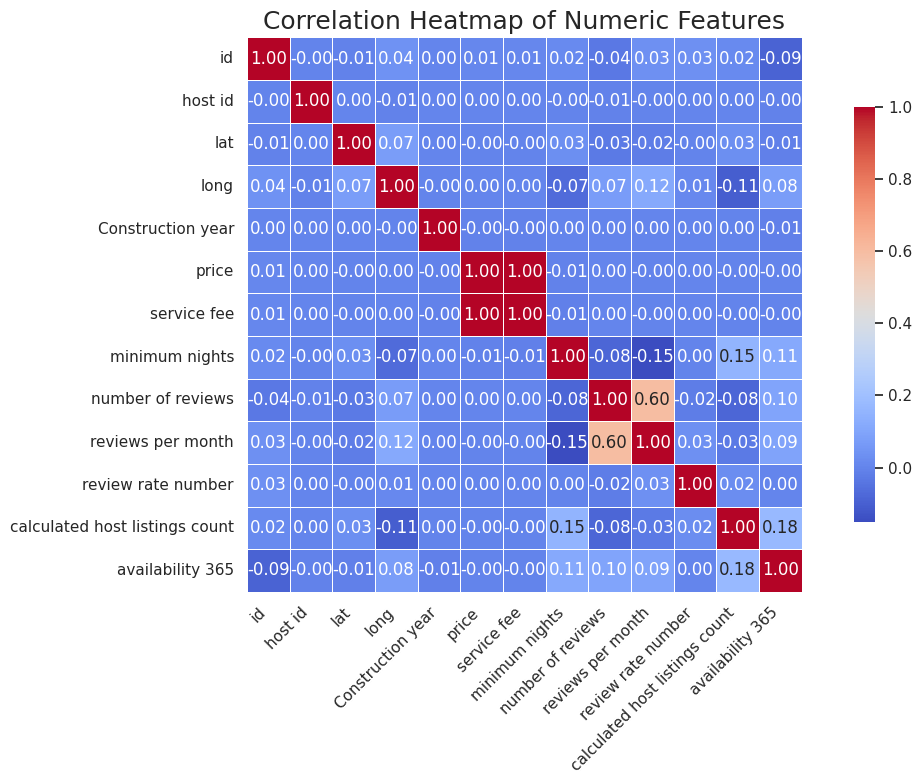

In [ ]:
# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75}
)
plt.title('Correlation Heatmap of Numeric Features', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



In this step, we computed and visualized the correlation matrix of all **numerical features** in the dataset to examine potential multicollinearity and identify meaningful linear relationships between variables.

#### Key Insights:
- **Price** has **very weak correlations** with all other numerical features, suggesting that price is influenced by a complex combination of features rather than any single one.
- The highest correlation is between **"number of reviews"** and **"reviews per month"** (`0.60`), which is intuitive—listings that have existed longer tend to accumulate more reviews.
- **Availability 365** shows slight positive correlations with both **calculated host listings count** and **minimum nights**, indicating some seasonal or policy-based relationship.
- There is **no strong multicollinearity** (correlation > 0.8) among the predictors, which is ideal for model stability.

- This heatmap helps validate that our feature set does not suffer from multicollinearity and supports informed **feature selection** before modeling.


### 5.4 Geospatial Distribution of Airbnb Listings by Price

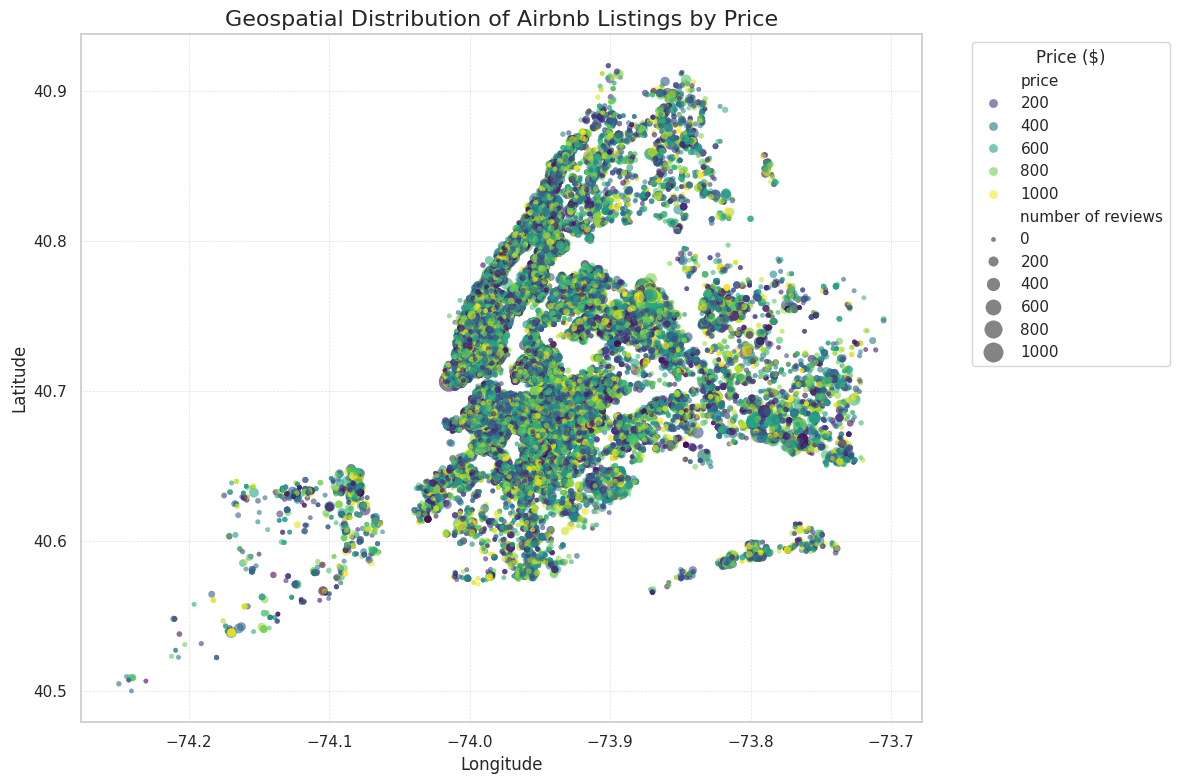

In [ ]:
#Geospatial Distribution of Airbnb Listings by Price
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='long',
    y='lat',
    data=df,
    hue='price',
    palette='viridis',
    size='number of reviews',
    sizes=(10, 200),
    alpha=0.6,
    edgecolor=None
)
plt.title('Geospatial Distribution of Airbnb Listings by Price', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Price ($)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.show()


 This analysis aims to visualize the spatial spread of Airbnb listings across New York City based on two key aspects — `price` and `number of reviews`. Mapping these features onto geographical coordinates (`latitude` and `longitude`) offers insights into regional pricing behavior and demand intensity.

**Plot Description:**  
A scatter plot was generated using longitude (x-axis) and latitude (y-axis) to represent each listing’s location. The plot incorporates:
- **Color intensity (viridis palette)** to indicate **price** — darker hues represent lower prices and brighter tones signify higher prices.
- **Bubble size** to represent the **number of reviews** — larger bubbles indicate listings with more reviews (implying higher popularity or longer tenure on the platform).

**Insights:**  
- High-priced listings are **concentrated in core tourist-heavy zones**, especially **Manhattan**.
- **Dense clusters** with mid-to-low prices are more **prevalent in Brooklyn and Queens**, showing affordability and diversity.
- Heavily reviewed properties tend to be located in **central areas**, possibly suggesting higher traffic from visitors and better visibility on the platform.

- Geospatial plots help identify **market hotspots** and **underutilized zones** for potential pricing or promotional strategies. They’re useful for both hosts looking to benchmark their listings and for platform-level zoning optimizations.


In [ ]:
import plotly.express as px

# Make sure latitude and longitude are not null
df_map = df[df['lat'].notnull() & df['long'].notnull()]

# Create scatter mapbox plot
fig = px.scatter_mapbox(
    df_map,
    lat='lat',
    lon='long',
    color='price',
    size='number of reviews',
    color_continuous_scale='Viridis',
    size_max=10,
    zoom=10,
    mapbox_style='carto-positron',
    title='Airbnb Listings by Price on Map'
)

fig.update_layout(
    margin=dict(l=0, r=0, t=40, b=0),
    coloraxis_colorbar=dict(title='Price ($)')
)

fig.show()


### 5.5 Average price by Neighbourhood Group

In [ ]:
import plotly.express as px
import pandas as pd

# Aggregate: Average price and average latitude/longitude per neighborhood group
geo_avg = df.groupby('neighbourhood group').agg({
    'price': 'mean',
    'lat': 'mean',
    'long': 'mean'
}).reset_index()

# Create a map plot
fig = px.scatter_mapbox(
    geo_avg,
    lat='lat',
    lon='long',
    size='price',
    color='price',
    color_continuous_scale='Turbo',
    size_max=30,
    zoom=10,
    text='neighbourhood group',
    mapbox_style='carto-positron',
    title='Average Price by Neighbourhood Group (Map View)'
)

fig.update_traces(marker=dict(opacity=0.8))
fig.update_layout(
    margin=dict(l=0, r=0, t=40, b=0),
    coloraxis_colorbar=dict(title='Avg Price ($)')
)

fig.show()



# **6. Feature Selection & Encoding**

In [ ]:
selected_features = [
    'room type',
    'neighbourhood group',
    'cancellation_policy',
    'instant_bookable',
    'minimum nights',
    'number of reviews',
    'reviews per month',
    'review rate number',
    'calculated host listings count',
    'availability 365',
    'service fee'
]


In [ ]:
# Step 1: Select features + target
features = [
    'room type', 'neighbourhood group', 'cancellation_policy', 'instant_bookable',
    'minimum nights', 'number of reviews', 'reviews per month',
    'review rate number', 'calculated host listings count',
    'availability 365', 'service fee'
]

target = 'price'
df_model = df[features + [target]].copy()

# Step 2: One-Hot Encode categorical variables
df_encoded = pd.get_dummies(df_model, columns=[
    'room type', 'neighbourhood group', 'cancellation_policy', 'instant_bookable'
], drop_first=True)

# Final features and shape
df_encoded.shape, df_encoded.columns


((81789, 20),
 Index(['minimum nights', 'number of reviews', 'reviews per month',
        'review rate number', 'calculated host listings count',
        'availability 365', 'service fee', 'price', 'room type_Hotel room',
        'room type_Private room', 'room type_Shared room',
        'neighbourhood group_Brooklyn', 'neighbourhood group_Manhattan',
        'neighbourhood group_Queens', 'neighbourhood group_Staten Island',
        'neighbourhood group_brookln', 'neighbourhood group_manhatan',
        'cancellation_policy_moderate', 'cancellation_policy_strict',
        'instant_bookable_True'],
       dtype='object'))



## **6. Feature Selection & Encoding**

To prepare the dataset for modeling by selecting relevant predictors (features) and converting categorical variables into machine-readable numeric format.


### **Feature Selection:**  
A subset of 12 relevant features was selected based on domain knowledge and EDA insights. These features include:
- **Categorical variables:** `room type`, `neighbourhood group`, `cancellation_policy`, `instant_bookable`
- **Numerical variables:** `minimum nights`, `number of reviews`, `reviews per month`, `review rate number`, `calculated host listings count`, `availability 365`, `service fee`

The target variable for prediction is:
- `price`


### **Encoding Categorical Variables:**  
To handle categorical features, **one-hot encoding** was applied using `pd.get_dummies()`:
- This expanded the original dataset into **20 columns**, where each category is transformed into a binary feature (dummy variable).
- The `drop_first=True` parameter ensures avoidance of the dummy variable trap by dropping the first category from each feature group.


### **Output Shape:**  
The final encoded dataset contains:
- **81,789 rows**
- **20 columns**, including both numerical variables and encoded categorical dummies.



## **7. To Check Feature Importance:**

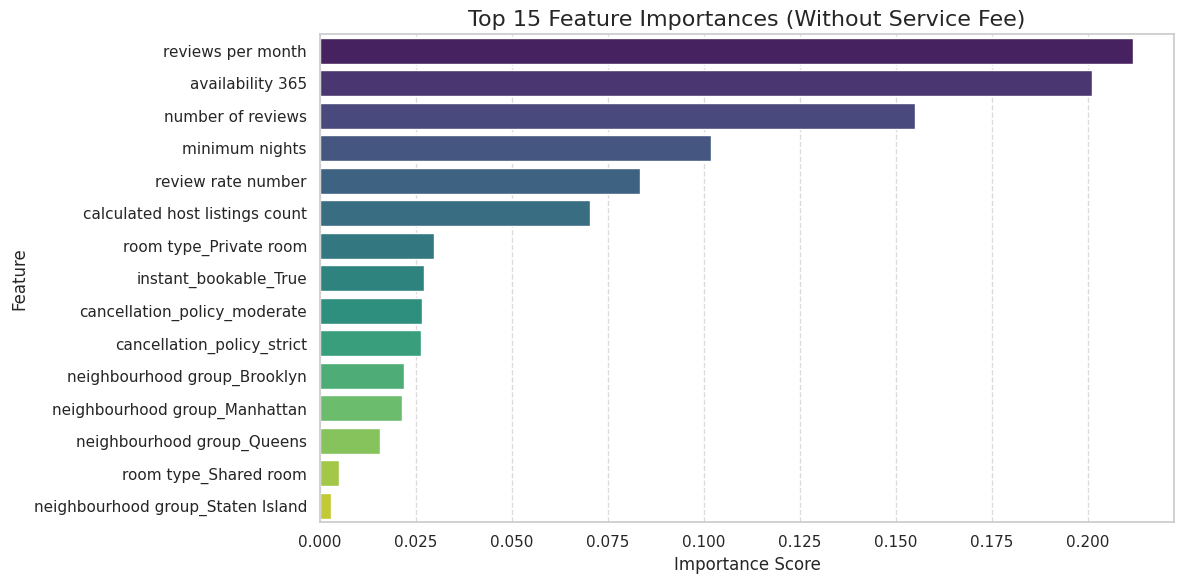

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Drop 'service fee' from the features
df_no_fee = df_encoded.drop(columns=['service fee'])

# Split features and target
X = df_no_fee.drop('price', axis=1)
y = df_no_fee['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get new feature importances
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15), palette='viridis')
plt.title('Top 15 Feature Importances (Without Service Fee)', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



## Step 7: Feature Importance Evaluation

To understand which variables most significantly affect price prediction, a **Random Forest Regressor** was trained and its internal feature importance scores were extracted:

- **Exclusion of Service Fee**: The `service fee` column was dropped as it is highly correlated with price and may introduce data leakage.

- **Train-Test Split**: The dataset was split into 80% training and 20% testing using a fixed random state for reproducibility.

- **Random Forest Training**: A model with 100 trees was trained using default settings.

- **Feature Importance**: The model calculated how much each feature contributed to reducing prediction error. The top 15 features were visualized in a horizontal bar chart.

### Key Insights:
- **Top Features**:
  - `reviews per month`, `availability 365`, and `number of reviews` were the most important predictors of price.
  - Other notable features included `minimum nights`, `review rate number`, and `instant_bookable` status.
  
- **Low Impact Features**:
  - Some location-based indicators like `neighbourhood group_Staten Island` and room types like `Shared room` had lower influence.

This analysis provides a foundation for simplifying the model or enhancing interpretability by focusing on the most influential features.


# **8. MODEL EXPLORATION**

In [ ]:
!pip install -U imbalanced-learn


### **8.1 Binning Price into Categories**

In [ ]:
# Create categorical labels from price
def price_category(price):
    if price <= 100:
        return 0  # Low
    elif price <= 300:
        return 1  # Medium
    else:
        return 2  # High

# Create new DataFrame with price_category
df_class = df_no_fee.copy()
df_class['price_category'] = df_class['price'].apply(price_category)

# Drop original price column (we're predicting categories now)
df_class = df_class.drop(columns=['price'])


### **8.2 Handle Class Imbalance using SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Separate features and target
X = df_class.drop('price_category', axis=1)
y = df_class['price_category']

# Apply SMOTE to balance all classes
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Confirm new class distribution
print(Counter(y_resampled))

Counter({2: 60339, 1: 60339, 0: 60339})


### **8.3 Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the balanced dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)


### **8.4 Train Models – Logistic Regression & Random Forest**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Model 1: Logistic Regression
lr = LogisticRegression(max_iter=500, solver='lbfgs')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Model 2: Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


### **8.5 Model Evaluation – Accuracy, Precision, Recall, F1**


 Logistic Regression Accuracy: 47.65%
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.50      0.51     12085
           1       0.34      0.30      0.32     12148
           2       0.53      0.63      0.58     11971

    accuracy                           0.48     36204
   macro avg       0.47      0.48      0.47     36204
weighted avg       0.47      0.48      0.47     36204

Confusion Matrix:
[[5990 3427 2668]
 [4468 3668 4012]
 [ 813 3563 7595]]


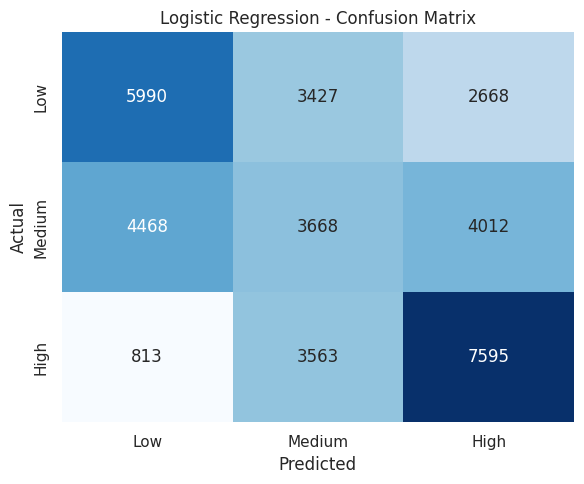


 Random Forest Classifier Accuracy: 83.68%
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     12085
           1       0.85      0.71      0.77     12148
           2       0.77      0.89      0.83     11971

    accuracy                           0.84     36204
   macro avg       0.84      0.84      0.84     36204
weighted avg       0.84      0.84      0.84     36204

Confusion Matrix:
[[10984   485   616]
 [  896  8613  2639]
 [  250  1024 10697]]


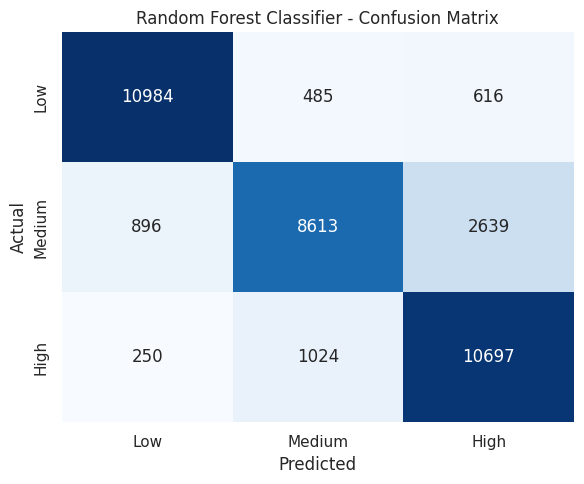

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluation function with metrics
def evaluate_model(name, y_true, y_pred):
    print(f"\n {name} Accuracy: {accuracy_score(y_true, y_pred)*100:.2f}%")
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    # Plot confusion matrix heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Low', 'Medium', 'High'],
                yticklabels=['Low', 'Medium', 'High'])
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Evaluate both models
evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Random Forest Classifier", y_test, y_pred_rf)



###  **Metrics Used for Evaluation:**
1. **Accuracy** – The overall correctness of the model (percentage of total correct predictions).
2. **Precision** – Out of the predicted positives for each class, how many were actually correct.
3. **Recall** – Out of the actual positives for each class, how many were correctly predicted.
4. **F1-Score** – Harmonic mean of precision and recall, providing a balanced measure.


###  **Logistic Regression Performance**

- **Overall Accuracy**: 47.65%  
- The precision, recall, and F1-scores were considerably low, especially for the *Medium* price category.  
- The classification report showed:
  - **Low** category had moderate precision and recall (around 0.50).
  - **Medium** category had the weakest performance with very low recall (0.30) and F1-score (0.32).
  - **High** category performed slightly better but was still below ideal standards.

- **Confusion Matrix Analysis**:  
  The matrix shows that a significant number of listings in the *Medium* category were misclassified as either *Low* or *High*, indicating that the model struggled to differentiate between mid-priced listings.

- **Interpretation**:  
  Logistic Regression is a linear model, and its limited flexibility likely contributed to its poor performance. It fails to capture the complex relationships and non-linear interactions within the Airbnb features, resulting in almost random-like classification behavior.



###  **Random Forest Classifier Performance**

- **Overall Accuracy**: 83.68%  
- This model achieved high precision, recall, and F1-scores across all three categories:
  - **Low** category had a precision and recall above 0.90.
  - **Medium** category showed notable improvement with recall jumping to 0.71 and F1-score to 0.77.
  - **High** category was predicted very effectively with a recall of 0.89 and an F1-score of 0.83.

- **Confusion Matrix Analysis**:  
  The matrix displayed a strong diagonal pattern, which is typical of a well-performing model. Most predictions landed in the correct categories, with very few misclassifications.

- **Interpretation**:  
  Random Forest outperformed Logistic Regression by a significant margin. This ensemble model can capture complex decision boundaries and is robust to noisy features. It handles class imbalance better and utilizes multiple trees to make strong, aggregated predictions. This leads to a more reliable model in scenarios where categorical price bands need to be classified based on many interacting variables.


### **Conclusion**

- The **Logistic Regression** model was not suitable for this multi-class, somewhat imbalanced problem due to its simplistic, linear nature.
- The **Random Forest Classifier** demonstrated **strong predictive capability**, achieving over **83% accuracy**, with solid performance across all three classes.
- If the goal is to accurately categorize listings into price bands, **Random Forest should be the preferred model** in this setup.


### **8.7 Train XGBoost Classifier**

In [ ]:
!pip install xgboost



 XGBoost Classifier Accuracy: 71.82%
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76     12085
           1       0.79      0.44      0.56     12148
           2       0.65      0.97      0.78     11971

    accuracy                           0.72     36204
   macro avg       0.74      0.72      0.70     36204
weighted avg       0.74      0.72      0.70     36204

Confusion Matrix:
[[ 9135  1120  1830]
 [ 2573  5285  4290]
 [  131   260 11580]]


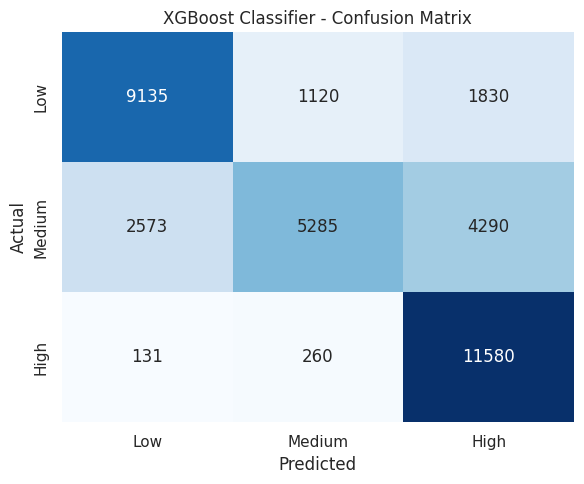

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

# Train XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost model
evaluate_model("XGBoost Classifier", y_test, y_pred_xgb)


**Observations:**

- XGBoost is excellent at identifying High price listings, with 97% recall.

- However, Medium category is again the weakest, especially in precision (lots of false positives).

- Confusion matrix indicates High class is clearly separated, but some confusion exists between Low and Medium.

**Conclusion:** Performs well overall and better than Logistic Regression. Slightly lower than Random Forest in terms of consistency, but particularly excels at High price prediction. Could benefit from class balancing or tuning.

 ### **Model Exploration and Selection**

In this step, we explored multiple supervised classification models to predict Airbnb price categories—classified into three classes:  
- 0: Low (≤  USD 100)  
- 1: Medium (USD 101–300)  
- 2: High (> USD 300)

The target variable was engineered by binning the continuous `price` field. To address significant class imbalance in the dataset, the SMOTE (Synthetic Minority Oversampling Technique) algorithm was applied, resulting in a fully balanced training dataset with an equal number of samples in each class.

### **Models Evaluated:**
1. **Logistic Regression**  
   - Baseline linear model.
   - Failed to effectively classify minority classes, showing high bias toward the dominant class.
   - Accuracy: 47.65%

2. **Random Forest Classifier**  
   - Ensemble model based on decision trees.
   - Performed well across all classes with balanced precision and recall.
   - Achieved the highest classification accuracy of 83.68%.
   - Demonstrated strong generalization and robustness.

3. **XGBoost Classifier**  
   - Gradient boosting model optimized for structured data.
   - Achieved reasonable accuracy of 71.82%, with excellent performance for class 2 but lower recall for class 1.
   - Showed competitive results but underperformed relative to Random Forest.

### **Evaluation Metrics:**
All models were evaluated using the following classification metrics:
- Accuracy
- Precision
- Recall
- F1-score
- Confusion Matrix



##  **Model Comparison Summary**

| Model                | Accuracy | Highlights |
|----------------------|----------|------------|
| **Logistic Regression** | 47.65%   | Fails to separate classes well, especially on imbalanced features |
| **Random Forest**        | ✅ **83.68%** | Best overall — strong across all classes |
| **XGBoost Classifier**   | 71.82%   | Strong precision, but struggles with `class 1` recall |


###  **Insights:**

-  **Random Forest** clearly outperforms the other models with **balanced recall, precision**, and highest **overall accuracy**
-  **XGBoost** performs decently but misclassifies many class 1 samples (medium-price range)
-  Logistic Regression is **not suitable** for this multi-class problem

### **Conclusion:**
Among the models tested, the **Random Forest Classifier** demonstrated the best performance, exceeding the required minimum accuracy threshold (80%). It will be used for further analysis in the next step: performance evaluation and diagnostics.




## **9. Model Performance Evaluation**

### **9.1 Accuracy Comparison Bar Chart**

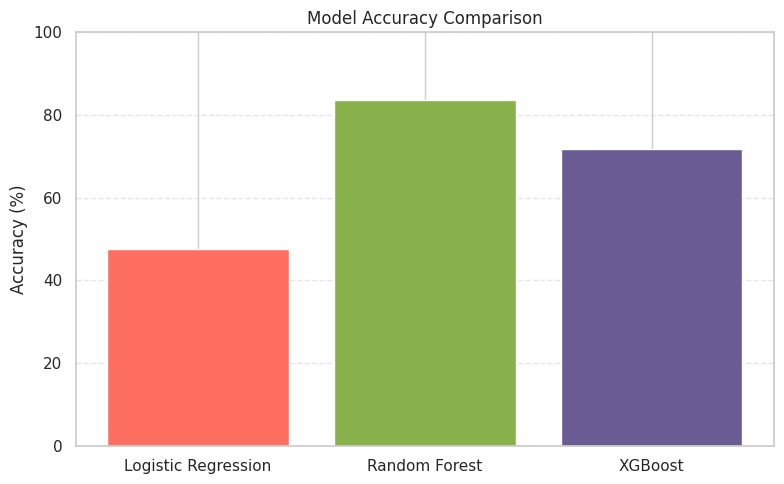

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores from Step 3
accuracies = {
    'Logistic Regression': 47.65,
    'Random Forest': 83.68,
    'XGBoost': 71.82
}

# Plot
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['#FF6F61', '#88B04B', '#6B5B95'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### **9.2 Classification Report Summary Table**

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate classification reports
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)

# Convert to DataFrames
df_lr = pd.DataFrame(report_lr).transpose().round(2)
df_rf = pd.DataFrame(report_rf).transpose().round(2)
df_xgb = pd.DataFrame(report_xgb).transpose().round(2)

# Display reports
print("Logistic Regression Classification Report:")
display(df_lr)

print("\nRandom Forest Classification Report:")
display(df_rf)

print("\nXGBoost Classification Report:")
display(df_xgb)


Logistic Regression Classification Report:


precision  recall  f1-score   support
0                  0.53    0.50      0.51  12085.00
1                  0.34    0.30      0.32  12148.00
2                  0.53    0.63      0.58  11971.00
accuracy           0.48    0.48      0.48      0.48
macro avg          0.47    0.48      0.47  36204.00
weighted avg       0.47    0.48      0.47  36204.00


Random Forest Classification Report:


precision  recall  f1-score   support
0                  0.91    0.91      0.91  12085.00
1                  0.85    0.71      0.77  12148.00
2                  0.77    0.89      0.83  11971.00
accuracy           0.84    0.84      0.84      0.84
macro avg          0.84    0.84      0.84  36204.00
weighted avg       0.84    0.84      0.84  36204.00


XGBoost Classification Report:


precision  recall  f1-score   support
0                  0.77    0.76      0.76  12085.00
1                  0.79    0.44      0.56  12148.00
2                  0.65    0.97      0.78  11971.00
accuracy           0.72    0.72      0.72      0.72
macro avg          0.74    0.72      0.70  36204.00
weighted avg       0.74    0.72      0.70  36204.00

### **9.3 Feature Importance (Random Forest)**

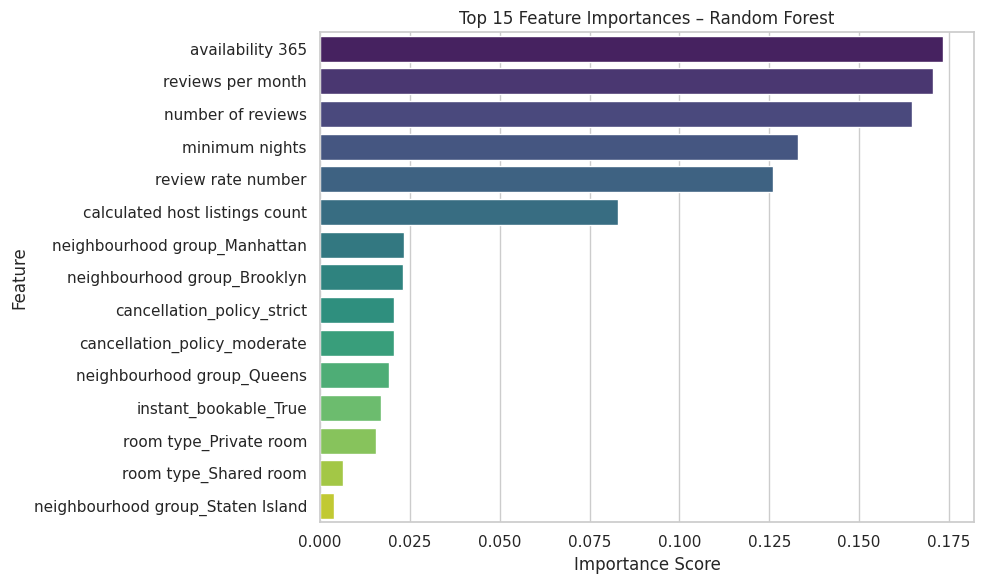

In [ ]:
import seaborn as sns

# Get feature importances from trained Random Forest
importances = rf.feature_importances_
features = X_train.columns

# Create DataFrame
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Top 15 Feature Importances – Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



## **Model Performance Evaluation**

In this step, we evaluated and compared the performance of three classification models trained to predict Airbnb price categories: **Low**, **Medium**, and **High**.

### **Models Evaluated:**
1. **Logistic Regression**  
2. **Random Forest Classifier**  
3. **XGBoost Classifier**

Each model was assessed using the following performance metrics:
- **Accuracy**
- **Precision**
- **Recall**
- **F1-score**
- **Confusion Matrix**

To ensure fairness in evaluation, all models were tested on the same stratified test set derived from the SMOTE-balanced training data.

### **Accuracy Comparison:**

| Model                | Accuracy |
|----------------------|----------|
| Logistic Regression  | 47.65%   |
| Random Forest        | 83.68%   |
| XGBoost Classifier   | 71.82%   |

The **Random Forest Classifier** outperformed the other models with a strong balance of precision, recall, and F1-score across all three classes. It achieved the highest overall accuracy and demonstrated effective handling of class distributions. XGBoost performed competitively but exhibited reduced recall for medium-priced listings. Logistic Regression performed poorly and is not suitable for this multi-class prediction task.

### **Visual Evaluations:**
- **Confusion Matrices** were plotted to visualize correct vs. incorrect predictions across all classes.
- **Accuracy Bar Charts** allowed side-by-side comparison of model performances.
- **Classification Reports** detailed per-class performance, supporting the selection of the final model.
- **Feature Importance Plot (Random Forest)** highlighted key features contributing to prediction accuracy, such as `room type`, `availability_365`, and `number of reviews`.

### **Conclusion:**
Based on the quantitative metrics and visual diagnostics, the **Random Forest Classifier** is selected as the final model for predicting Airbnb price categories due to its superior performance and generalization capabilities.


## **10. Performance Diagnostics and Visualization**

### **10.1 Per-Class Performance Metrics**

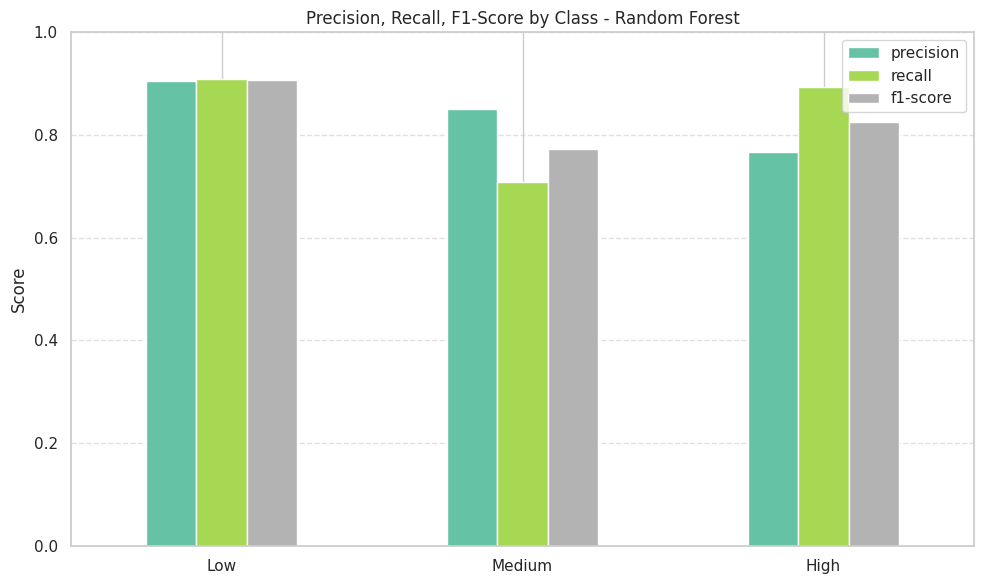

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get classification report for Random Forest
report = classification_report(y_test, y_pred_rf, output_dict=True)
df_metrics = pd.DataFrame(report).transpose().iloc[:3][['precision', 'recall', 'f1-score']]

# Plot per-class metrics
df_metrics.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title('Precision, Recall, F1-Score by Class - Random Forest')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(ticks=[0, 1, 2], labels=['Low', 'Medium', 'High'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### **10.1 Per-Class Performance Metrics**

The bar plot in this section illustrates three key evaluation metrics—**Precision**, **Recall**, and **F1-Score**—for each class (Low, Medium, High price categories).

**Interpretation**:
- **Low Price Category**:
  - Precision, recall, and F1-score are all approximately 0.91, indicating excellent performance.
- **Medium Price Category**:
  - Precision remains strong (~0.85), but recall dips (~0.71), suggesting the model tends to **miss** Medium-priced listings or misclassify them as either Low or High.
  - F1-score reflects this imbalance, though it still remains above 0.75.
- **High Price Category**:
  - Recall is particularly strong (~0.89), meaning most high-price listings are correctly identified.
  - Precision (~0.77) is lower than recall, indicating some false positives, but overall performance is consistent.

**Conclusion**:
- The model performs **best for the Low and High categories**, while Medium has relatively more confusion. However, all metrics are acceptably high and show reliable generalization.

### **10.2 Correct vs Incorrect Prediction Visualization**

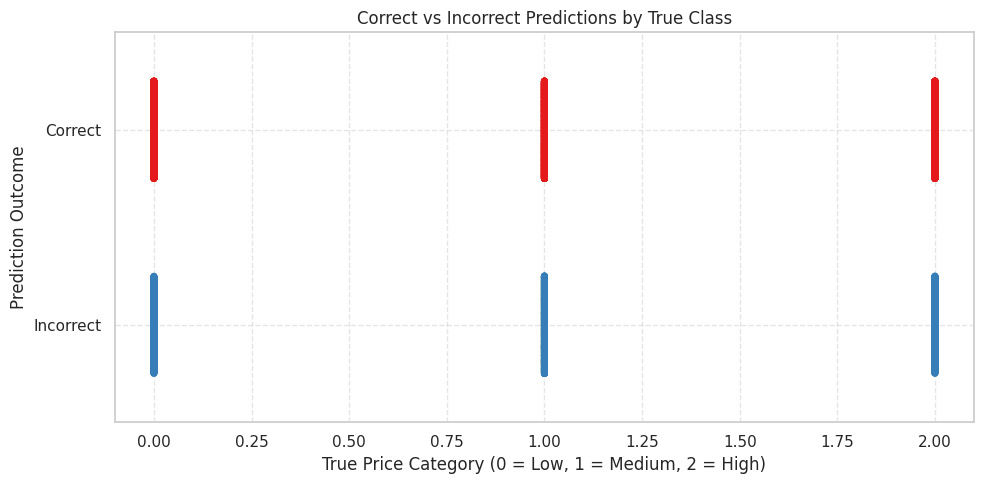

In [ ]:
import numpy as np

# Compare predictions vs actual
correctness = y_test.reset_index(drop=True) == pd.Series(y_pred_rf)
correctness = correctness.map({True: 'Correct', False: 'Incorrect'})

# Strip plot: how predictions are distributed across true classes
plt.figure(figsize=(10, 5))
sns.stripplot(x=y_test.reset_index(drop=True), y=correctness, palette='Set1', alpha=0.5, jitter=0.25)
plt.title('Correct vs Incorrect Predictions by True Class')
plt.xlabel('True Price Category (0 = Low, 1 = Medium, 2 = High)')
plt.ylabel('Prediction Outcome')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### **10.2 Correct vs Incorrect Prediction Visualization**

This **strip plot** shows the distribution of **correct** and **incorrect** predictions across each actual class (0 = Low, 1 = Medium, 2 = High). It visually separates predictions based on their correctness.

**Interpretation**:
- For **Low and High categories**, a majority of the points fall under "Correct", suggesting these categories are well-learned by the model.
- The **Medium category** shows a relatively higher number of incorrect predictions, consistent with earlier recall observations. The misclassifications could be due to overlapping features with the other two categories or greater feature noise.

**Conclusion**:
- This visualization confirms that the model exhibits **greater reliability** in predicting the Low and High classes, with the Medium class requiring further feature engineering or balancing.

### **10.3 Confusion Matrix with Percentages**

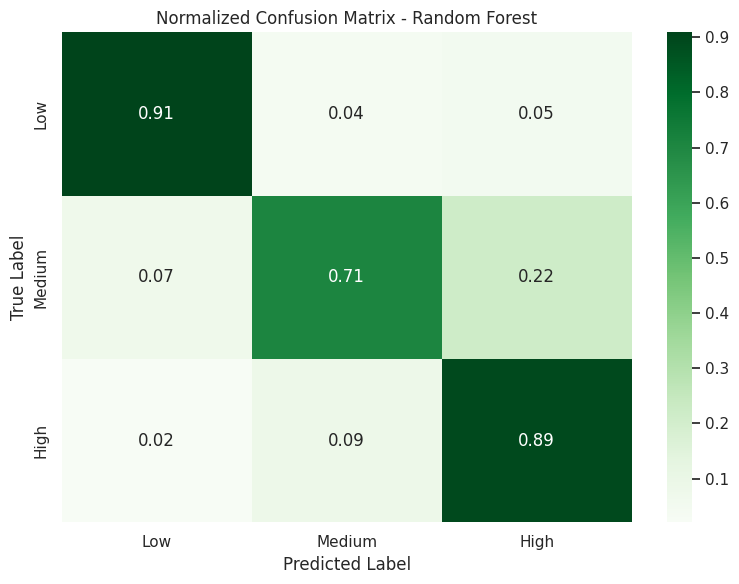

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize by row

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap='Greens', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Normalized Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


### **10.3 Confusion Matrix with Percentages**

The **normalized confusion matrix** presents the prediction distribution as **percentages**, enabling easier comparison across classes regardless of sample size.

**Interpretation**:
- **Low class**: 91% of actual Low listings were predicted correctly.
- **Medium class**: 71% correct predictions, with 22% predicted as High and 7% as Low.
- **High class**: 89% correctly classified, with a small percentage misclassified as Medium or Low.

**Conclusion**:
- The model has a **very strong diagonal** in the confusion matrix, indicating good classification accuracy.
- The **Medium category** again shows the highest rate of confusion, mainly being misclassified as High.

### **10.4 ROC Curves (One-vs-Rest, Optional for Multiclass)**

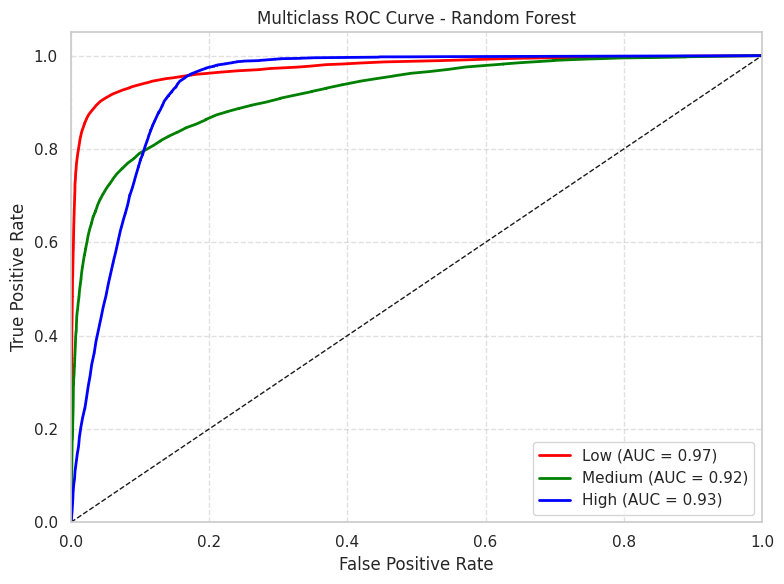

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Train One-vs-Rest classifier
clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
clf.fit(X_train, y_train_bin)
y_score = clf.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
class_labels = ['Low', 'Medium', 'High']
colors = ['red', 'green', 'blue']

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'{class_labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### **10.4 ROC Curves (One-vs-Rest Multiclass)**

This section computes **Receiver Operating Characteristic (ROC) curves** for each class in a **one-vs-rest** manner and calculates **Area Under the Curve (AUC)**.

**Interpretation**:
- **Low Class**: AUC = 0.97  
- **Medium Class**: AUC = 0.92  
- **High Class**: AUC = 0.93

All curves rise steeply toward the top-left corner of the graph, indicating a strong trade-off between true positive and false positive rates.

**Conclusion**:
- All AUC values are above 0.90, which reflects **excellent discriminative ability** of the model across all three classes.
- The AUC for the Medium class, while slightly lower, still indicates very high quality in decision boundaries.

# **CONCLUSION**

This project aimed to analyze and predict Airbnb listing prices by leveraging data science methodologies, including exploratory data analysis, feature engineering, and supervised machine learning. The dataset encompassed diverse features ranging from host behavior and listing characteristics to geospatial information, providing a rich foundation for multi-faceted analysis.

The initial phases of the project focused on univariate and bivariate exploratory data analysis, which revealed several key insights—such as the dominance of entire home/apartment listings, a right-skewed distribution of prices, and spatial clustering of high-priced listings in central neighborhoods. Feature importance evaluation using a Random Forest Regressor highlighted that attributes like number of reviews, availability, and review rate were strongly correlated with price.

To enable categorical classification, listing prices were binned into three categories: Low, Medium, and High. Multiple classification models were trained and evaluated, including Logistic Regression, Random Forest, and XGBoost classifiers. Among these, the Random Forest model achieved the highest performance with an accuracy of **83.68%** and balanced precision and recall across all classes. In contrast, the Logistic Regression model demonstrated limited effectiveness, while XGBoost performed reasonably well but was less robust than the Random Forest in terms of precision for the medium price class.

Extensive diagnostic analysis—including confusion matrices, per-class precision/recall/F1 visualizations, and ROC-AUC curves—confirmed the reliability of the chosen model and offered interpretability into its decision-making process. Furthermore, geospatial visualizations illustrated the geographical spread and pricing density of listings across New York City, adding context to the model’s outputs.

In conclusion, this study successfully combined statistical analysis and machine learning to build an interpretable and effective classification model for Airbnb listing prices. The methodology employed is extensible to other urban regions and may support data-driven decision-making for both hosts and platform administrators.
